In [1]:
# Import packages
import collections

import numpy as np
import pandas as pd

import seaborn as sns 
from matplotlib import pyplot
import matplotlib.pyplot as plt 

from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

from sklearn.ensemble import ExtraTreesClassifier

import warnings
warnings.filterwarnings('ignore')

### Reading CSV file

In [2]:
df1 = pd.read_csv("./bank-additional/bank-additional-full.csv", sep=";")

In [3]:
# Get top 5 rows
df1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
# Information about the columns
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [5]:
# Description about columns
df1.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
# Checking if there is NA in the dataset
df1.isna().sum().sum()

0

#### So we do not need to worry about NAs

In [7]:
# Unique value count of column `nr.employed`
df1['nr.employed'].value_counts()

5228.1    16234
5099.1     8534
5191.0     7763
5195.8     3683
5076.2     1663
5017.5     1071
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: nr.employed, dtype: int64

In [8]:
# Unique value count of column `emp.var.rate`
df1['emp.var.rate'].value_counts()

 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64

In [9]:
# Converting the numerical datatye to category data type as the numerical values are very less.
df1['emp.var.rate'] = df1['emp.var.rate'].astype('category',copy=False)
df1['nr.employed'] = df1['nr.employed'].astype('category',copy=False)

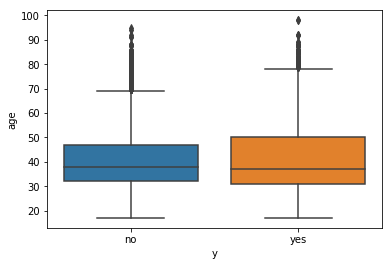

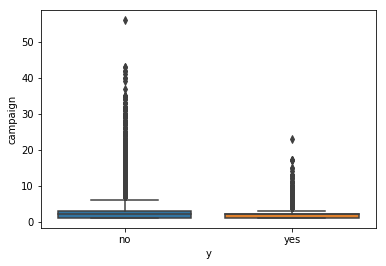

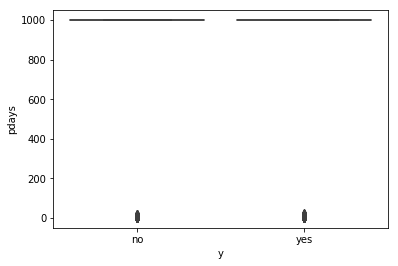

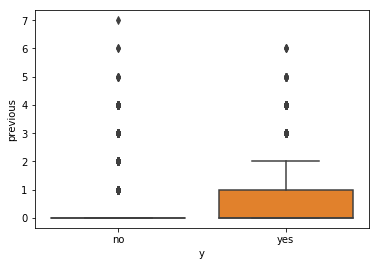

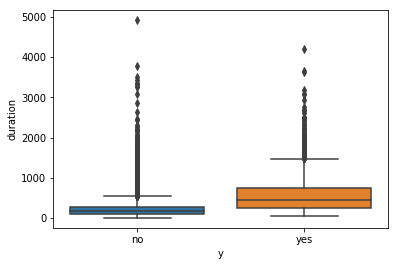

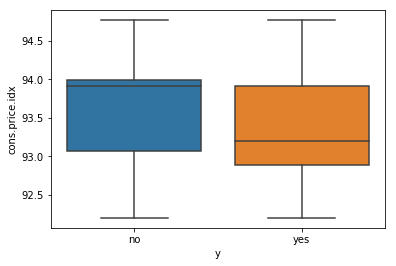

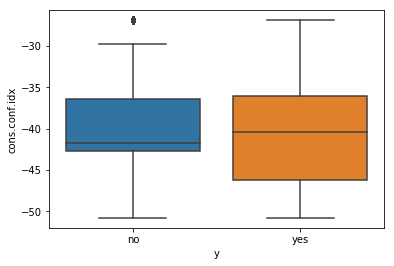

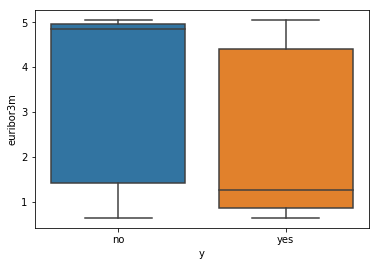

In [10]:
recently_converted_to_categorical_vars = ['emp.var.rate', 'nr.employed']
numeric_vars = ['age', 'campaign', 'pdays', 'previous', 'duration', 
                'cons.price.idx', 'cons.conf.idx', 'euribor3m']

# Fetching categorical variables
categorical_vars = [i for i in df1.columns if i not in numeric_vars]
# Removing target column
categorical_vars.remove('y')
categorical_vars.extend(recently_converted_to_categorical_vars)

target = 'y'

# Plotting Boxplot of the numerical vars with target var.
for var in numeric_vars:
    sns.boxplot(x=target, y=var, data=df1)
    plt.show()

Categorical Variable: job


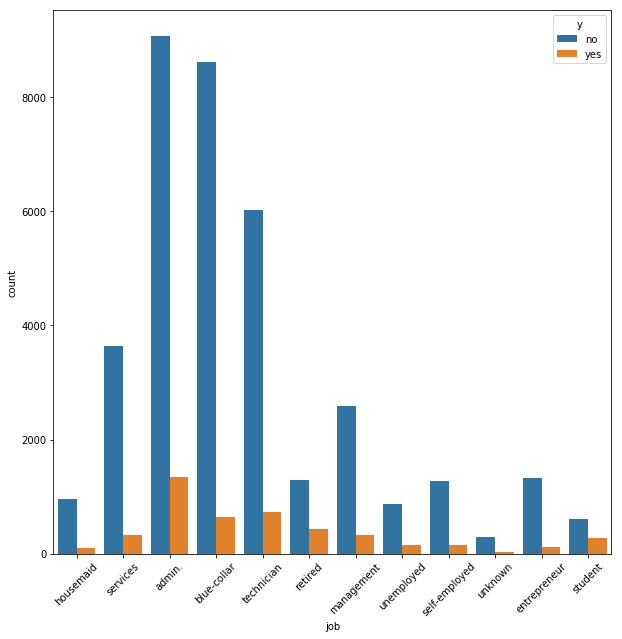

Categorical Variable: marital


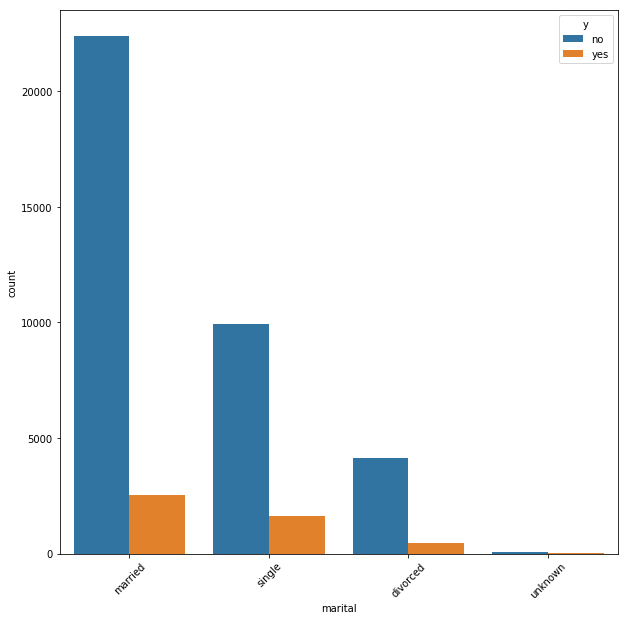

Categorical Variable: education


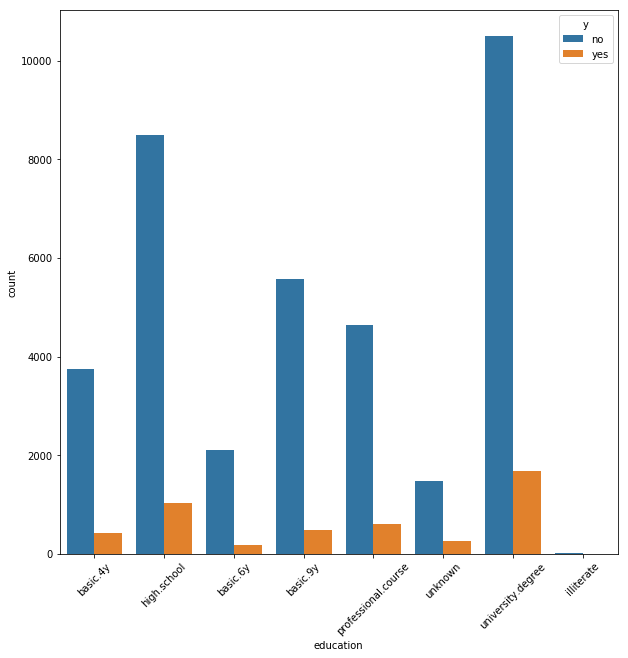

Categorical Variable: default


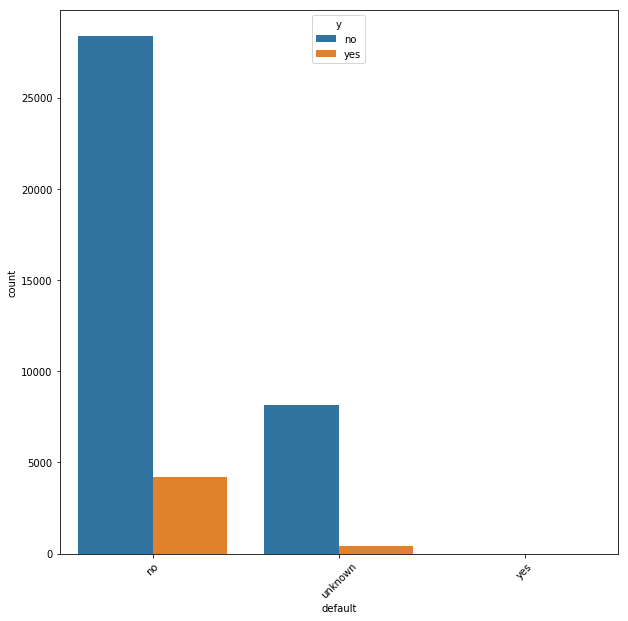

Categorical Variable: housing


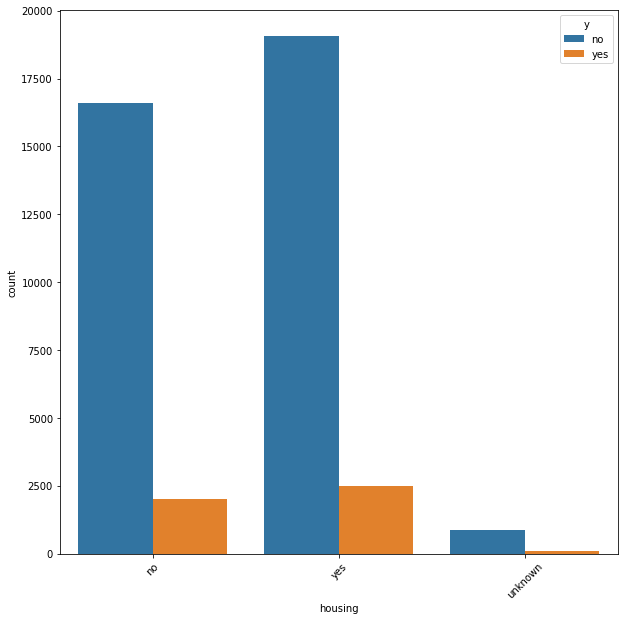

Categorical Variable: loan


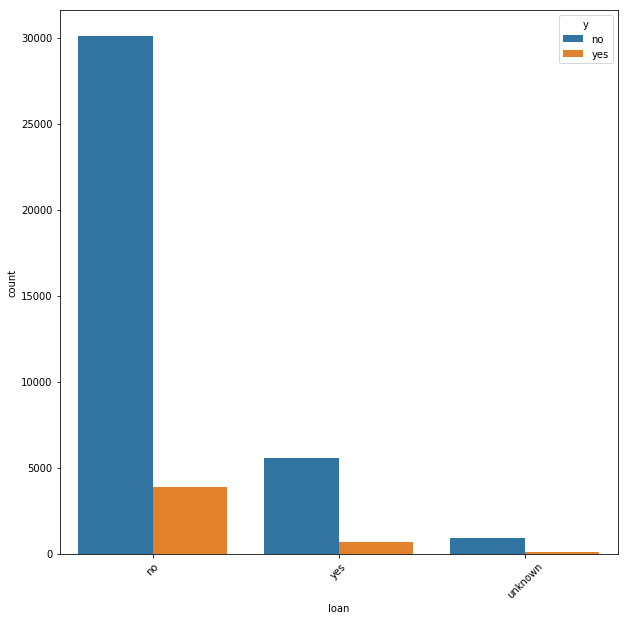

Categorical Variable: contact


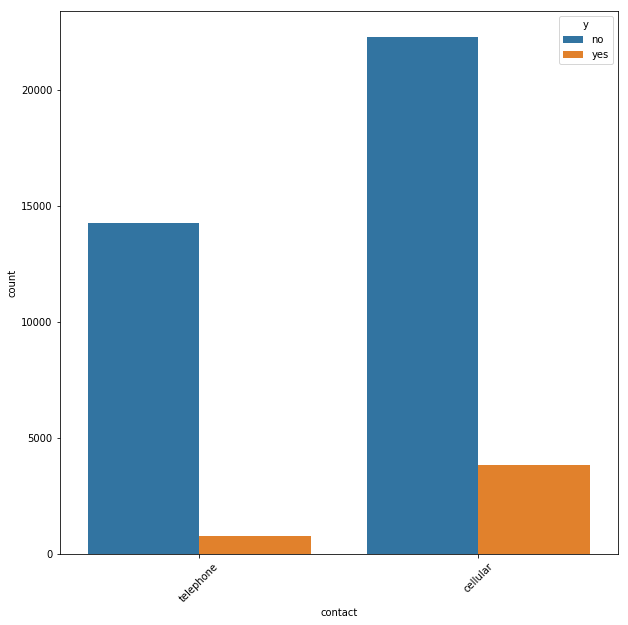

Categorical Variable: month


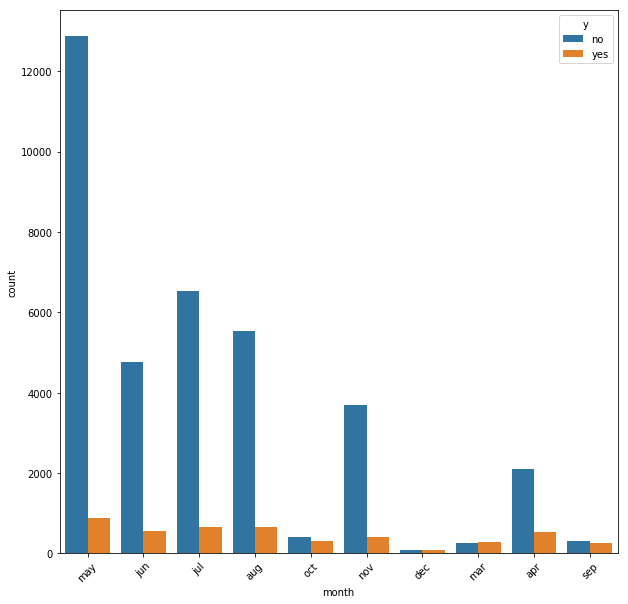

Categorical Variable: day_of_week


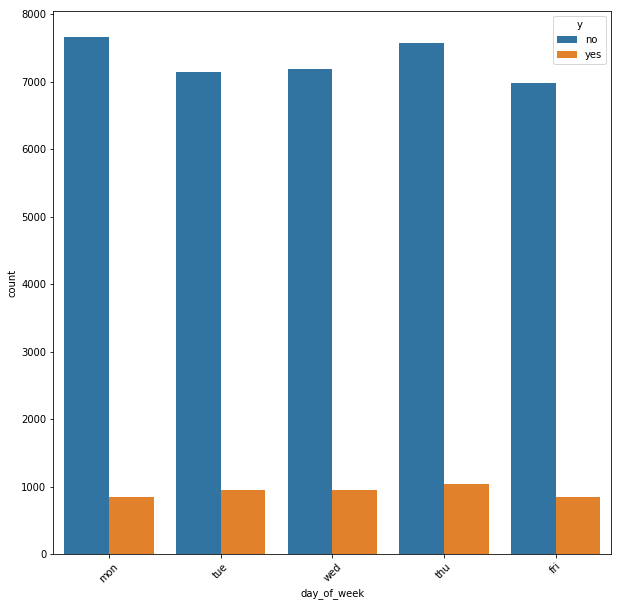

Categorical Variable: poutcome


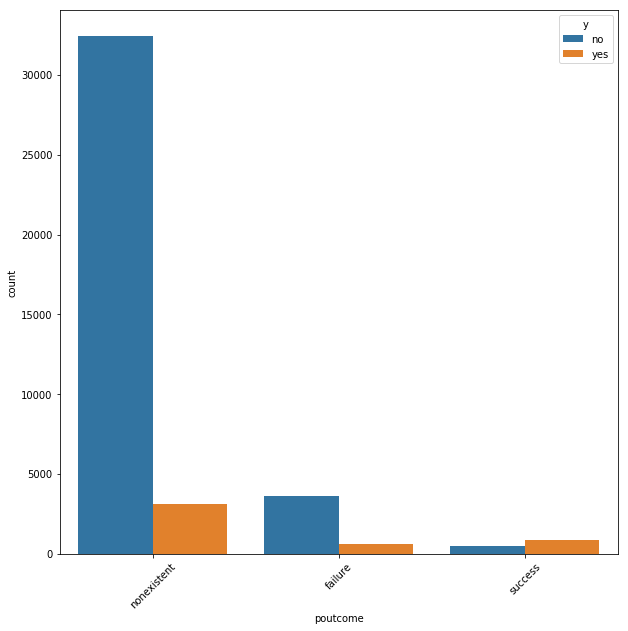

Categorical Variable: emp.var.rate


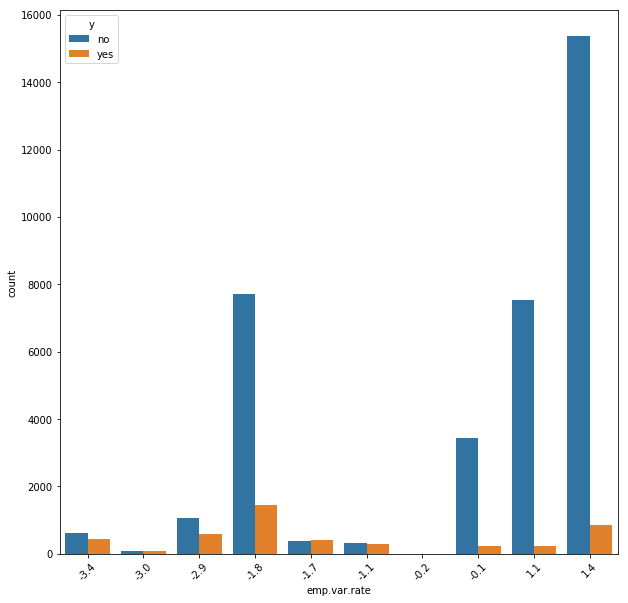

Categorical Variable: nr.employed


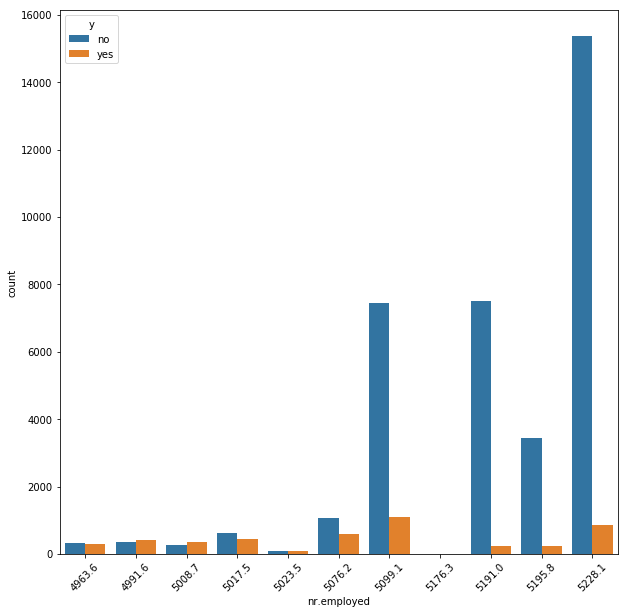

Categorical Variable: emp.var.rate


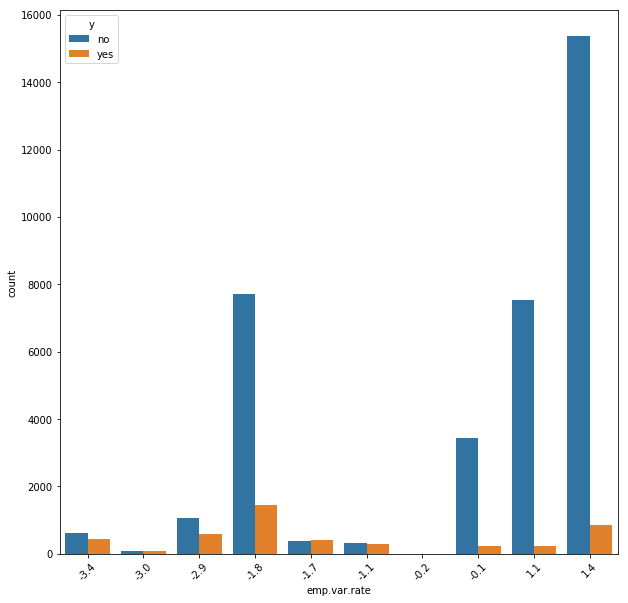

Categorical Variable: nr.employed


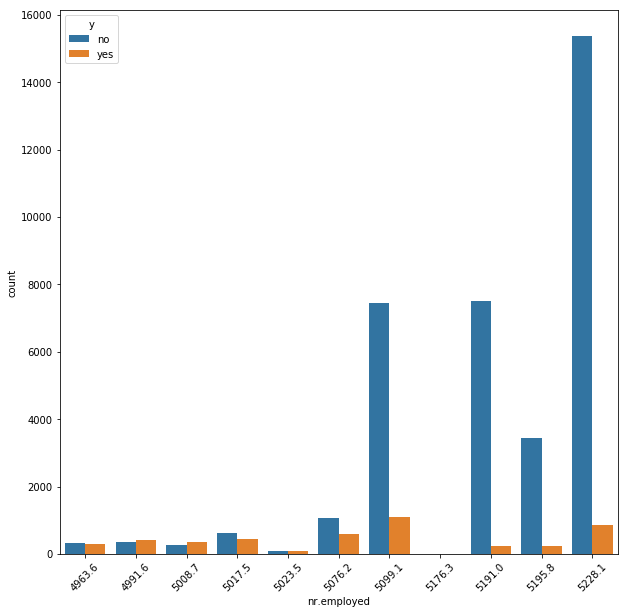

In [11]:
# Plotting BarPlot having count of each element in categorical col
for cat_var in categorical_vars:
    print("Categorical Variable: {}".format(cat_var))
    plt.figure(figsize=(10,10))
    sns.countplot(x=cat_var, hue=target, data=df1)
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=45)
    plt.show()

Plot between age and campaign


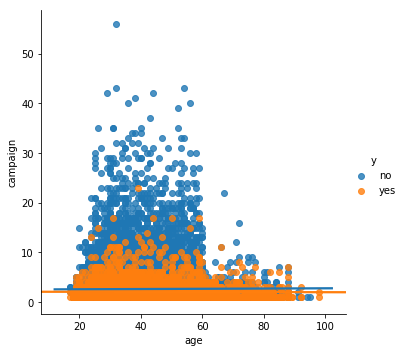

Plot between age and pdays


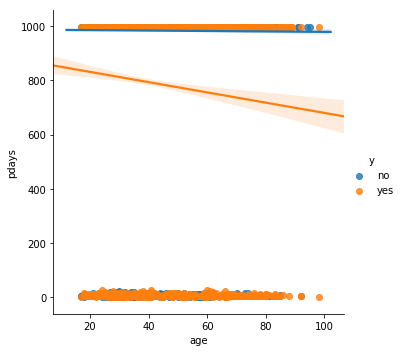

Plot between age and previous


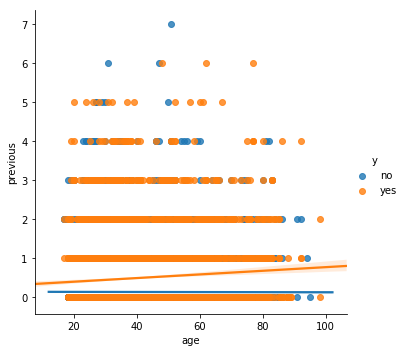

Plot between age and duration


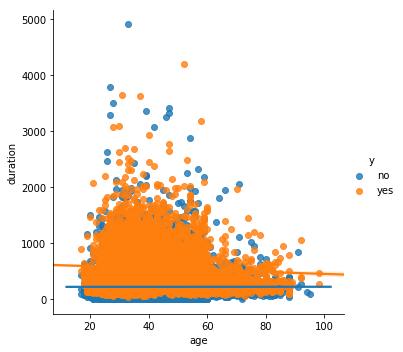

Plot between age and cons.price.idx


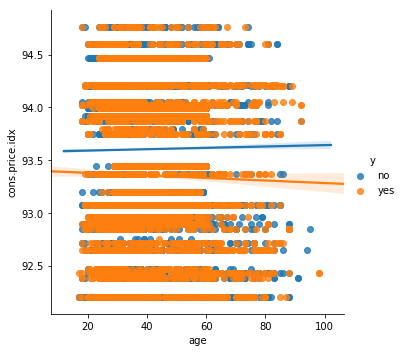

Plot between age and cons.conf.idx


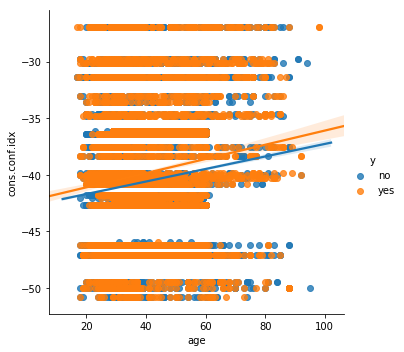

Plot between age and euribor3m


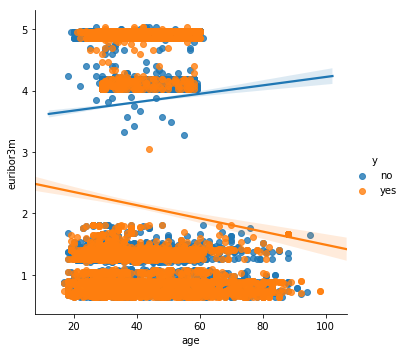

Plot between campaign and pdays


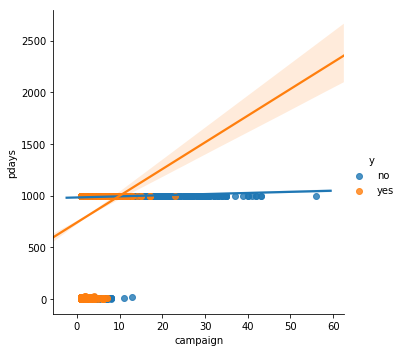

Plot between campaign and previous


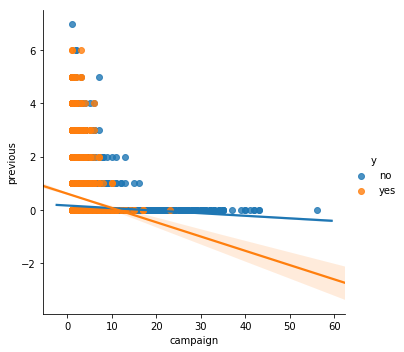

Plot between campaign and duration


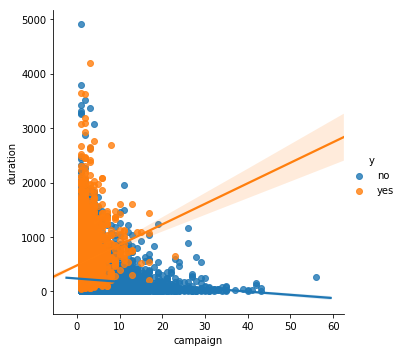

Plot between campaign and cons.price.idx


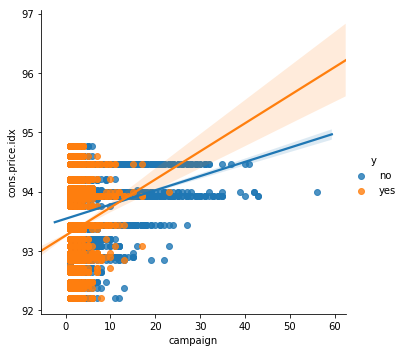

Plot between campaign and cons.conf.idx


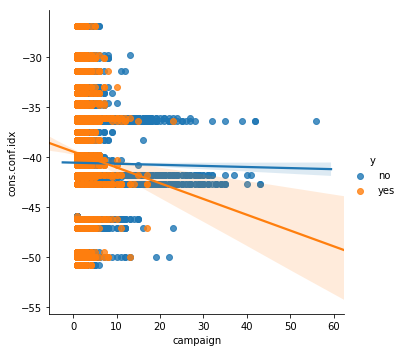

Plot between campaign and euribor3m


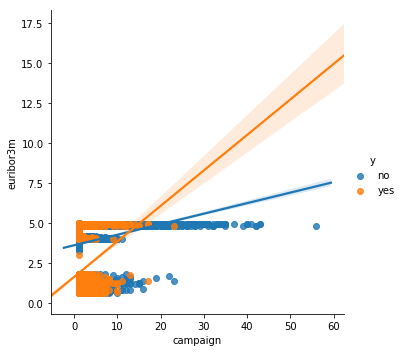

Plot between pdays and previous


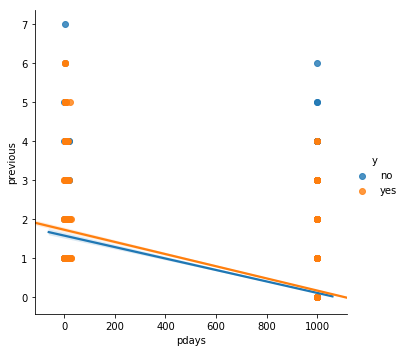

Plot between pdays and duration


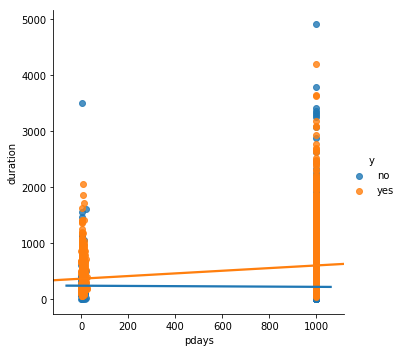

Plot between pdays and cons.price.idx


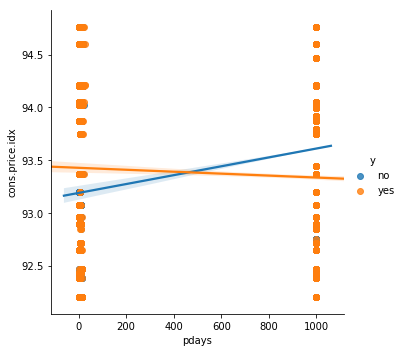

Plot between pdays and cons.conf.idx


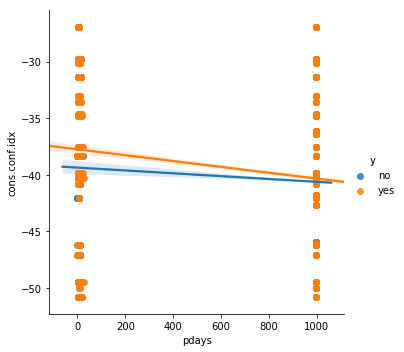

Plot between pdays and euribor3m


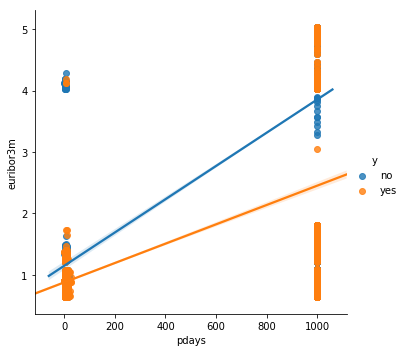

Plot between previous and duration


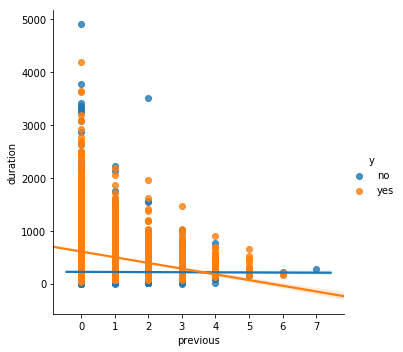

Plot between previous and cons.price.idx


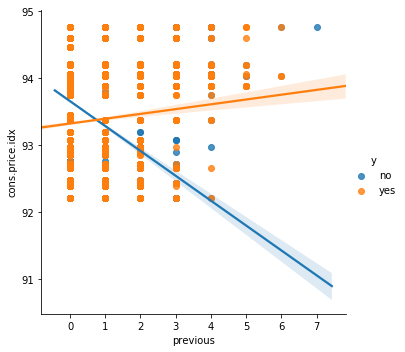

Plot between previous and cons.conf.idx


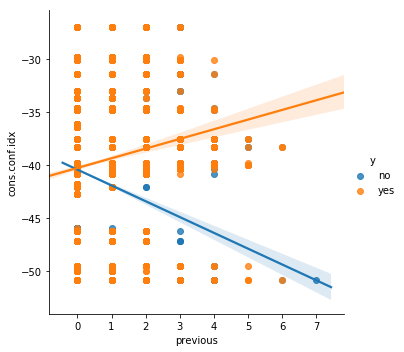

Plot between previous and euribor3m


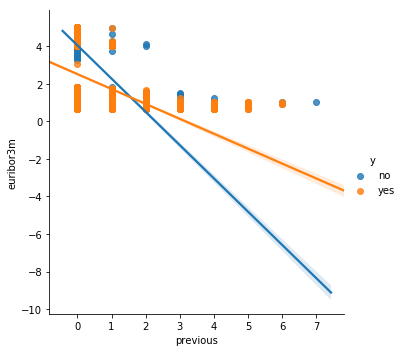

Plot between duration and cons.price.idx


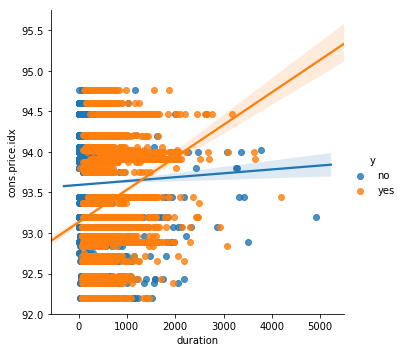

Plot between duration and cons.conf.idx


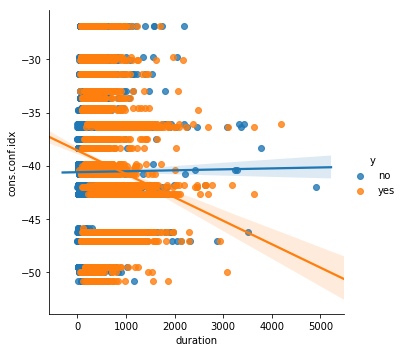

Plot between duration and euribor3m


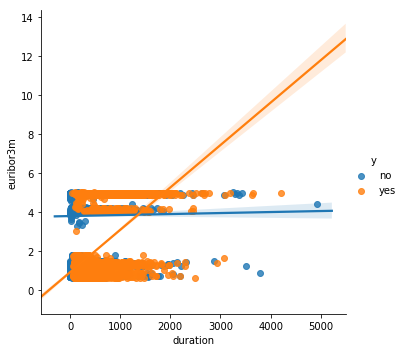

Plot between cons.price.idx and cons.conf.idx


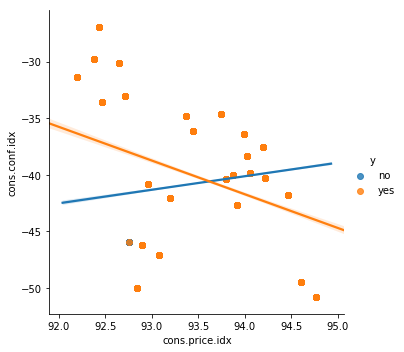

Plot between cons.price.idx and euribor3m


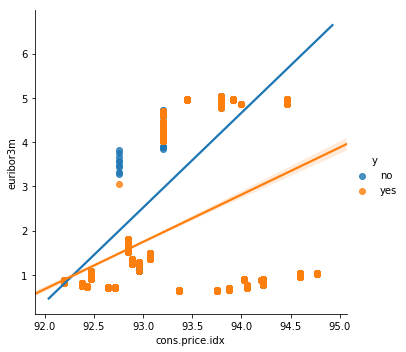

Plot between cons.conf.idx and euribor3m


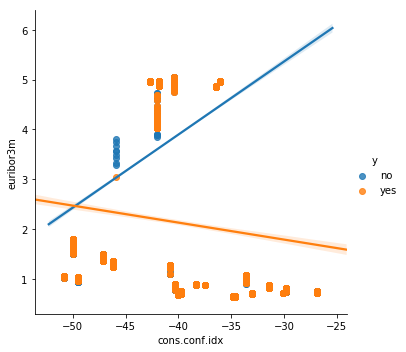

In [12]:
# Plotting all the lmplots having all possible combinations of numeric variables.
for i in range(len(numeric_vars)):
    for j in range(i+1,len(numeric_vars)):  
        print("Plot between {} and {}".format(numeric_vars[i], numeric_vars[j]))
        sns.lmplot(x=numeric_vars[i], y=numeric_vars[j], hue=target, data=df1)
        plt.show()

In [13]:
# Converting all categorical variables to 'category' datatype
for cat_col in categorical_vars:
    df1[cat_col] = df1[cat_col].astype('category')

In [14]:
# Converting all the values of categorical variables into numbers
cat_columns = df1.select_dtypes(['category']).columns
df1[cat_columns] = df1[cat_columns].apply(lambda x: x.cat.codes)

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null int8
marital           41188 non-null int8
education         41188 non-null int8
default           41188 non-null int8
housing           41188 non-null int8
loan              41188 non-null int8
contact           41188 non-null int8
month             41188 non-null int8
day_of_week       41188 non-null int8
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null int8
emp.var.rate      41188 non-null int8
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null int8
y                 41188 non-null object
dtypes: float64(3), int64(5), int8(12), object(1)
memory usage: 3.3+ MB


In [16]:
# thought of removing `pdays` column because majority of observation had same value BUT 
# removing the column resulted in drop in accuracy
# df1=df1.drop("pdays",axis=1)
# numeric_vars.remove("pdays")

df1['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

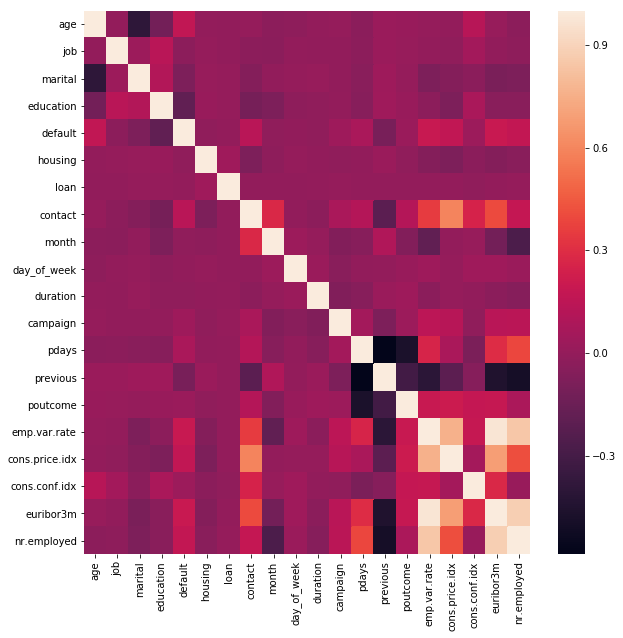

In [17]:
# Plotting Correlation plot
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr())
plt.show()

In [18]:
df1["y"] = [1 if val == "yes" else 0 for val in df1["y"]]

X = df1[[col for col in df1.columns if col != "y"]]  #independent columns  (or feature columns)
y = df1["y"]    #target column i.e price range

## Creating Supervised Model and choosing the model which give us the highest accuracy

[0.08860032 0.05822229 0.036686   0.05187258 0.00966438 0.02656538
 0.02064408 0.01256999 0.01559034 0.04903921 0.26297848 0.0584129
 0.04699989 0.01214833 0.03675401 0.01614118 0.01838672 0.01859335
 0.08927192 0.07085864]


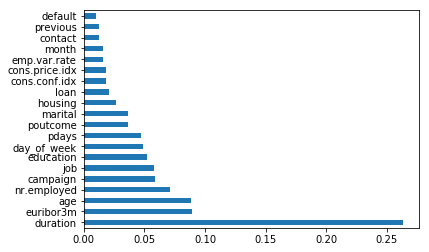

In [19]:
# Using Extre tree classifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) # use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [20]:
# we get that most of the numeric variables that we used were giving the best result
df_select = df1[feat_importances.nlargest(20).index.values]
df_select["y"] = df1["y"]
X = df_select[[col for col in df_select.columns if col != "y"]].values
y = df_select["y"].values

In [21]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(X)

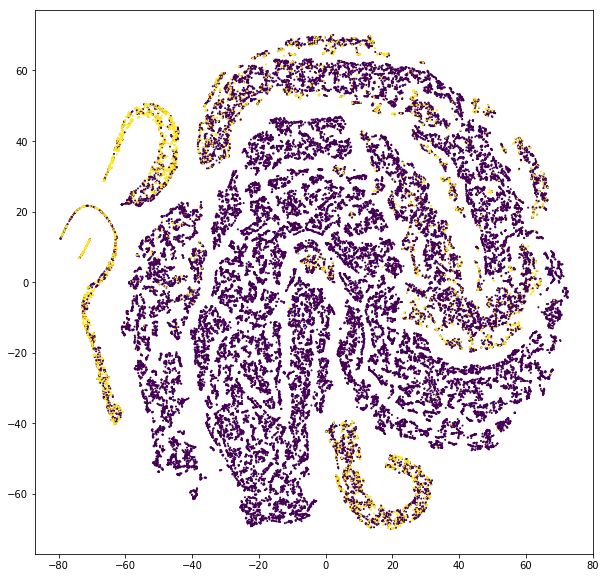

In [22]:
s = [1 for n in range(len(X_embedded[:,0]))]
plt.figure(figsize=(10,10))
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=df_select[target].values, s=s)
plt.show()
#these tsne plots show a clear distinction between the yes and no clusters..

In [23]:
#we can use knn classifier in this tsne results variables..
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

#split dataset into train and test data according to stratification..
X_train, X_test, y_train, y_test = train_test_split(X_embedded, y, test_size=0.2, 
                                                    random_state=1, stratify=y)

### Using KNN

In [24]:
#fitting the model and predictions on the test data..
from sklearn.metrics import accuracy_score

for i in range(10,400,10):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)

    print("k = {}   Accuracy: {}".format(i, accuracy_score(neigh.predict(X_test),y_test)))

k = 10   Accuracy: 0.9031318281136198
k = 20   Accuracy: 0.9056809905316825
k = 30   Accuracy: 0.9072590434571498
k = 40   Accuracy: 0.9050740470988103
k = 50   Accuracy: 0.9054382131585337
k = 60   Accuracy: 0.9056809905316825
k = 70   Accuracy: 0.9066521000242778
k = 80   Accuracy: 0.9055596018451081
k = 90   Accuracy: 0.9055596018451081
k = 100   Accuracy: 0.9059237679048313
k = 110   Accuracy: 0.9055596018451081
k = 120   Accuracy: 0.9062879339645545
k = 130   Accuracy: 0.9061665452779801
k = 140   Accuracy: 0.9054382131585337
k = 150   Accuracy: 0.9053168244719592
k = 160   Accuracy: 0.9050740470988103
k = 170   Accuracy: 0.9050740470988103
k = 180   Accuracy: 0.9049526584122359
k = 190   Accuracy: 0.9048312697256615
k = 200   Accuracy: 0.9051954357853847
k = 210   Accuracy: 0.9048312697256615
k = 220   Accuracy: 0.9049526584122359
k = 230   Accuracy: 0.9049526584122359
k = 240   Accuracy: 0.9051954357853847
k = 250   Accuracy: 0.9050740470988103
k = 260   Accuracy: 0.905074047098

In [25]:
# we can do oversampling on the non tsne X to get a balanced result..
x_train, x_val, y_train, y_val = train_test_split(X, y,
                                                  test_size = .1,
                                                  random_state=12)

In [26]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import  metrics
#applying somte for oversampling...
sm = SMOTE(random_state=12, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)

### Using RF

In [27]:
clf_rf = RandomForestClassifier(n_estimators=25, random_state=12)
clf_rf.fit(x_train_res, y_train_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=None,
            oob_score=False, random_state=12, verbose=0, warm_start=False)

In [28]:
importances = clf_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for ind, i in enumerate(indices):
    print("%d. Feature: %s (%f)" % (ind + 1, df1.columns[i], importances[ind]))
#     print(df1.columns[i], importances[ind])

Feature ranking:
1. Feature: age (0.300980)
2. Feature: job (0.112116)
3. Feature: education (0.029846)
4. Feature: cons.conf.idx (0.108133)
5. Feature: previous (0.023687)
6. Feature: emp.var.rate (0.019430)
7. Feature: poutcome (0.025253)
8. Feature: cons.price.idx (0.023751)
9. Feature: marital (0.012594)
10. Feature: campaign (0.021999)
11. Feature: loan (0.022376)
12. Feature: contact (0.028589)
13. Feature: default (0.011851)
14. Feature: duration (0.051381)
15. Feature: day_of_week (0.035818)
16. Feature: nr.employed (0.043648)
17. Feature: housing (0.034530)
18. Feature: euribor3m (0.056580)
19. Feature: month (0.016087)
20. Feature: pdays (0.021351)


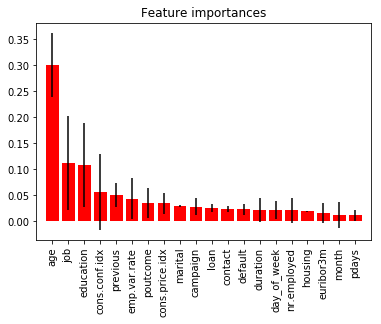

In [29]:
# Plot the feature importances of the forest
x_vals = [df1.columns[i] for i in indices]
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), x_vals)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [30]:
print('Validation Results')
print("Score: {}".format(clf_rf.score(x_val, y_val)))
print("Recall: {}".format(recall_score(y_val, clf_rf.predict(x_val))))

Validation Results
Score: 0.9109007040543822
Recall: 0.565121412803532


### Using XGBoost

In [31]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='logloss', early_stopping_rounds=early_stopping_rounds,verbose_eval=True)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print("\nModel Report")
    print(metrics.classification_report(dtrain[target].values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain[target], dtrain_predprob))
    feat_imp = pd.Series(alg.feature_importances_).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')
    plt.show()

In [32]:
predictors = [x for x in df_select.columns if x not in [target]]
df_res = pd.DataFrame(x_train_res, columns=predictors)
df_res["y"] = y_train_res

[0]	train-logloss:0.627658+0.00152398	test-logloss:0.627897+0.00144317
[1]	train-logloss:0.573809+0.00162619	test-logloss:0.574227+0.00163461
[2]	train-logloss:0.531208+0.00446414	test-logloss:0.53193+0.00429935
[3]	train-logloss:0.491459+0.00375649	test-logloss:0.492366+0.00355895
[4]	train-logloss:0.461408+0.00474103	test-logloss:0.462698+0.00488033
[5]	train-logloss:0.432959+0.00479987	test-logloss:0.434469+0.00482012
[6]	train-logloss:0.408365+0.00603477	test-logloss:0.410069+0.00609507
[7]	train-logloss:0.386565+0.00434695	test-logloss:0.388471+0.00423059
[8]	train-logloss:0.366964+0.00415336	test-logloss:0.368871+0.00402033
[9]	train-logloss:0.348497+0.00336263	test-logloss:0.350554+0.00323295
[10]	train-logloss:0.332428+0.0025254	test-logloss:0.334562+0.0024139
[11]	train-logloss:0.317786+0.00231255	test-logloss:0.319962+0.00208776
[12]	train-logloss:0.30543+0.00242055	test-logloss:0.307728+0.00236144
[13]	train-logloss:0.293521+0.00162449	test-logloss:0.295889+0.00198498
[14]	t

[113]	train-logloss:0.0945206+0.000553289	test-logloss:0.103737+0.000845356
[114]	train-logloss:0.0943482+0.000565282	test-logloss:0.103647+0.000872506
[115]	train-logloss:0.094131+0.000504365	test-logloss:0.103521+0.00090144
[116]	train-logloss:0.0939644+0.000471417	test-logloss:0.10342+0.000923329
[117]	train-logloss:0.0936972+0.000458662	test-logloss:0.103208+0.000950609
[118]	train-logloss:0.0934748+0.000459243	test-logloss:0.103079+0.000939351
[119]	train-logloss:0.0932684+0.0004963	test-logloss:0.102938+0.0009221
[120]	train-logloss:0.0930972+0.00049788	test-logloss:0.102875+0.000940865
[121]	train-logloss:0.0929076+0.000506803	test-logloss:0.102771+0.000954676
[122]	train-logloss:0.0926926+0.000518839	test-logloss:0.102662+0.000945465
[123]	train-logloss:0.0925198+0.000504447	test-logloss:0.102592+0.000963814
[124]	train-logloss:0.0923476+0.000526705	test-logloss:0.102496+0.00100676
[125]	train-logloss:0.092108+0.000509944	test-logloss:0.102333+0.00100347
[126]	train-logloss:0.0

[223]	train-logloss:0.079701+0.00049981	test-logloss:0.0982838+0.00130694
[224]	train-logloss:0.0796254+0.000471528	test-logloss:0.0982552+0.00132083
[225]	train-logloss:0.0795294+0.000474254	test-logloss:0.098245+0.00132484
[226]	train-logloss:0.0794378+0.000492284	test-logloss:0.0982534+0.00133381
[227]	train-logloss:0.0793316+0.000475249	test-logloss:0.0982226+0.00135896
[228]	train-logloss:0.0792462+0.000475247	test-logloss:0.0982066+0.001377
[229]	train-logloss:0.0791614+0.000479002	test-logloss:0.0982026+0.00138532
[230]	train-logloss:0.0790708+0.000480932	test-logloss:0.0981884+0.00139498
[231]	train-logloss:0.0789806+0.000471768	test-logloss:0.0981796+0.00138102
[232]	train-logloss:0.0788766+0.000466081	test-logloss:0.0981432+0.00135018
[233]	train-logloss:0.0787866+0.00046117	test-logloss:0.0981356+0.00134073
[234]	train-logloss:0.0786892+0.000452747	test-logloss:0.0981414+0.00133986
[235]	train-logloss:0.0785936+0.000443705	test-logloss:0.0981266+0.00135989
[236]	train-loglos

[332]	train-logloss:0.0705228+0.000557051	test-logloss:0.0977512+0.00160733
[333]	train-logloss:0.0704612+0.000568021	test-logloss:0.0977564+0.00161882
[334]	train-logloss:0.0703902+0.000554262	test-logloss:0.0977582+0.00162867
[335]	train-logloss:0.0703122+0.000547735	test-logloss:0.0977496+0.0016439
[336]	train-logloss:0.0702338+0.000534337	test-logloss:0.097748+0.00165894
[337]	train-logloss:0.0701588+0.000513392	test-logloss:0.0977396+0.00168807
[338]	train-logloss:0.070089+0.000527015	test-logloss:0.0977502+0.00169718
[339]	train-logloss:0.070005+0.000528248	test-logloss:0.0977594+0.00170951
[340]	train-logloss:0.0699288+0.000535016	test-logloss:0.0977812+0.00173162
[341]	train-logloss:0.0698428+0.000519958	test-logloss:0.0977806+0.0017388
[342]	train-logloss:0.0698008+0.000525491	test-logloss:0.0977858+0.00173265
[343]	train-logloss:0.069704+0.000529155	test-logloss:0.0977768+0.00175315

Model Report
              precision    recall  f1-score   support

           0       0.96  

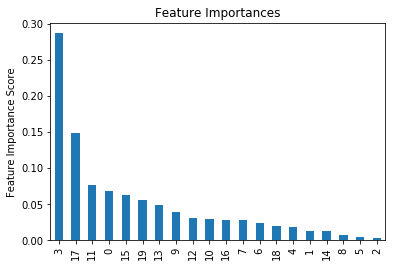

In [33]:
#Choose all predictors and perform cross-validation to select hyperparameters
xgb1= XGBClassifier(
 learning_rate =0.1,
 n_estimators=500,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb1, df_res, predictors)

In [34]:
print('Validation Results')

dtest_predictions = xgb1.predict(pd.DataFrame(x_val,columns=predictors))
dtest_predprob = xgb1.predict_proba(pd.DataFrame(x_val,columns=predictors))[:,1]

print(metrics.classification_report(y_val, dtest_predictions))

Validation Results
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      3666
           1       0.66      0.56      0.60       453

   micro avg       0.92      0.92      0.92      4119
   macro avg       0.80      0.76      0.78      4119
weighted avg       0.91      0.92      0.92      4119



# So XGBoost model is most accurate

# Plotting regression plots for different attributes

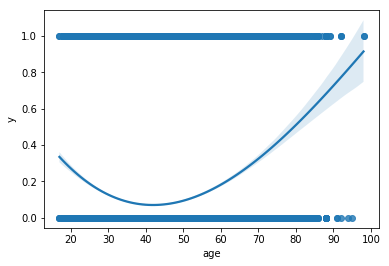

In [35]:
ax = sns.regplot(x="age", y="y", order=3, data=df1, truncate=True)

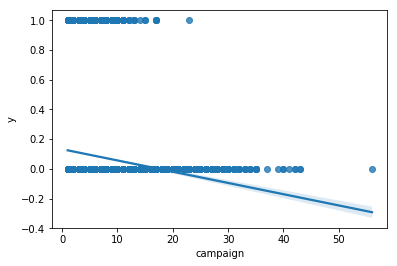

In [36]:
ax = sns.regplot(x="campaign", y="y", order=1, data=df1, truncate=True)

### Above figure states that campaign after 20 is useless. Therefore, no customer should be approached more than 20 times.

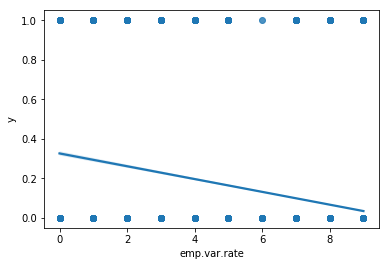

In [37]:
ax = sns.regplot(x="emp.var.rate", y="y", order=1, data=df1, truncate=True)

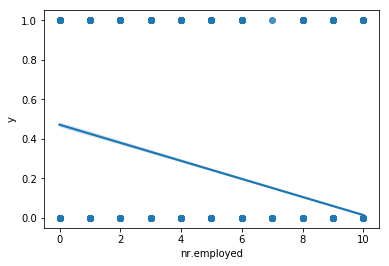

In [38]:
ax = sns.regplot(x="nr.employed", y="y", order=1, data=df1, truncate=True)

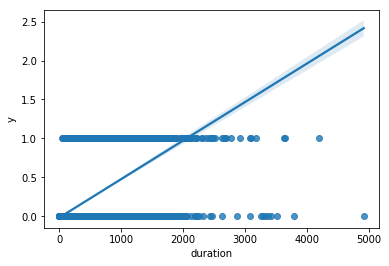

In [39]:
ax = sns.regplot(x="duration", y="y", order=1, data=df1, truncate=True)

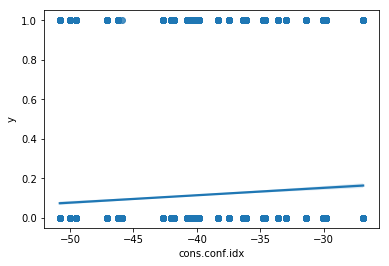

In [40]:
ax = sns.regplot(x="cons.conf.idx", y="y", order=1, data=df1, truncate=True)

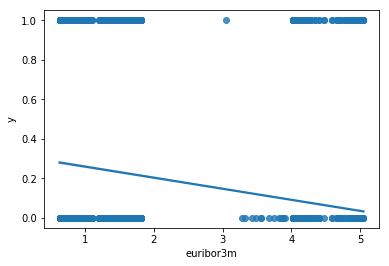

In [41]:
ax = sns.regplot(x="euribor3m", y="y", order=1, data=df1, truncate=True)

### Optimization using compaign

In [42]:
# Total Conversion ratio
sum(df1[df1['y']==1]['y'])/sum(df1['campaign'])

0.043875408967982296

### Efficiency on each additional call

In [43]:
print("Nth Call \t Conversion ratio")
for i in range(1,30):
    eff = sum(df1.loc[(df1['campaign']==i) & (df1['y']==1)]['y']) / float(df1.loc[df1['campaign'] >= i].shape[0])
    print (str(i) + " \t\t " + str(eff))

Nth Call 	 Conversion ratio
1 		 0.05584150723511702
2 		 0.05143124097511254
3 		 0.04423551171393342
4 		 0.03261296660117878
5 		 0.024077046548956663
6 		 0.022156573116691284
7 		 0.015793848711554447
8 		 0.009566685424873381
9 		 0.012345679012345678
10 		 0.010968921389396709
11 		 0.01380897583429229
12 		 0.004335260115606936
13 		 0.007054673721340388
14 		 0.002105263157894737
15 		 0.0049261083743842365
16 		 0.0
17 		 0.013157894736842105
18 		 0.0
19 		 0.0
20 		 0.0
21 		 0.0
22 		 0.0
23 		 0.008620689655172414
24 		 0.0
25 		 0.0
26 		 0.0
27 		 0.0
28 		 0.0
29 		 0.0


## The market acceptable conversion ratio ranges from 2-10% and from above we can see that after 6th call the ratio is around 1.5%. So the calls after 6th call are not acceptable

In [44]:
print("For age upto 30")
print ("Nth Call \t Conversion ratio")
for i in range(1,30):
    num = float(df1[(df1['age'] <= 30) & (df1['campaign']==i) & (df1['y']==1)].shape[0])
    den = 1+float(df1[(df1['age'] <= 30) & (df1['campaign'] >= i)].shape[0])
    print (str(i) + " \t\t " + str(num/den))

For age upto 30
Nth Call 	 Conversion ratio
1 		 0.07502708559046588
2 		 0.07100309745055992
3 		 0.06274509803921569
4 		 0.04447739065974796
5 		 0.03882352941176471
6 		 0.02058319039451115
7 		 0.030805687203791468
8 		 0.006493506493506494
9 		 0.012875536480686695
10 		 0.005376344086021506
11 		 0.013888888888888888
12 		 0.0
13 		 0.010869565217391304
14 		 0.0
15 		 0.014705882352941176
16 		 0.0
17 		 0.0
18 		 0.0
19 		 0.0
20 		 0.0
21 		 0.0
22 		 0.0
23 		 0.0
24 		 0.0
25 		 0.0
26 		 0.0
27 		 0.0
28 		 0.0
29 		 0.0


In [45]:
print("For age between 30-40")
print ("Nth Call \t Conversion ratio")
for i in range(1,30):
    num = float(df1[(df1['age'] <= 40) & (df1['age'] > 30) & (df1['campaign']==i) & (df1['y']==1)].shape[0])
    den = 1+float(df1[(df1['age'] <= 40) & (df1['age'] > 30) & (df1['campaign'] >= i)].shape[0])
    print (str(i) + " \t\t " + str(num/den))

For age between 30-40
Nth Call 	 Conversion ratio
1 		 0.04882216526302942
2 		 0.042643923240938165
3 		 0.04005444293214078
4 		 0.028093645484949834
5 		 0.02048131080389145
6 		 0.024279210925644917
7 		 0.007494646680942184
8 		 0.008746355685131196
9 		 0.011538461538461539
10 		 0.011990407673860911
11 		 0.015015015015015015
12 		 0.0076045627376425855
13 		 0.009523809523809525
14 		 0.0
15 		 0.0
16 		 0.0
17 		 0.009259259259259259
18 		 0.0
19 		 0.0
20 		 0.0
21 		 0.0
22 		 0.0
23 		 0.02040816326530612
24 		 0.0
25 		 0.0
26 		 0.0
27 		 0.0
28 		 0.0
29 		 0.0


In [46]:
print("For age between 50-60")
print ("Nth Call \t Conversion ratio")
for i in range(1,30):
    num = float(df1[(df1['age'] <= 60) & (df1['age'] > 50) & (df1['campaign']==i) & (df1['y']==1)].shape[0])
    den = 1+float(df1[(df1['age'] <= 60) & (df1['age'] > 50) & (df1['campaign'] >= i)].shape[0])
    print (str(i) + " \t\t " + str(num/den))


For age between 50-60
Nth Call 	 Conversion ratio
1 		 0.050709615691277306
2 		 0.05120481927710843
3 		 0.040806293018682396
4 		 0.024681528662420384
5 		 0.016766467065868262
6 		 0.02120141342756184
7 		 0.022004889975550123
8 		 0.013559322033898305
9 		 0.024489795918367346
10 		 0.009900990099009901
11 		 0.0
12 		 0.0
13 		 0.0
14 		 0.0
15 		 0.011363636363636364
16 		 0.0
17 		 0.016129032258064516
18 		 0.0
19 		 0.0
20 		 0.0
21 		 0.0
22 		 0.0
23 		 0.0
24 		 0.0
25 		 0.0
26 		 0.0
27 		 0.0
28 		 0.0
29 		 0.0


In [47]:
print("For age above 60")
print ("Nth Call \t Conversion ratio")
for i in range(1,30):
    num = float(df1[(df1['age'] > 60) & (df1['campaign']==i) & (df1['y']==1)].shape[0])
    den = float(df1[(df1['age'] > 60) & (df1['campaign'] >= i)].shape[0])+1
    print (str(i) + " \t\t " + str(num/den))

For age above 60
Nth Call 	 Conversion ratio
1 		 0.24807903402854006
2 		 0.25806451612903225
3 		 0.20512820512820512
4 		 0.19230769230769232
5 		 0.12244897959183673
6 		 0.12121212121212122
7 		 0.18181818181818182
8 		 0.06666666666666667
9 		 0.0
10 		 0.0
11 		 0.16666666666666666
12 		 0.0
13 		 0.0
14 		 0.0
15 		 0.0
16 		 0.0
17 		 0.0
18 		 0.0
19 		 0.0
20 		 0.0
21 		 0.0
22 		 0.0
23 		 0.0
24 		 0.0
25 		 0.0
26 		 0.0
27 		 0.0
28 		 0.0
29 		 0.0


## Age groups do not show any remarkable patterns compared to the numbers over all ages

In [48]:
# total calls made
total_calls = sum(df1['campaign'])
print(total_calls)

105754


In [49]:
# total calls made after 6th call
extra_calls = sum(df1[df1['campaign']>6]['campaign']) - 6*df1[df1['campaign']>6].shape[0]
print(extra_calls)

12040


In [50]:
#market cost reduction
reduction=100*extra_calls/total_calls
print(reduction)

11.384912154622993


In [51]:
total_sales=float(df1[df1['y']==1].shape[0])
print(total_sales)

4640.0


In [52]:
less_costly_sales=float(df1[(df1['campaign'] <= 6) & (df1['y']==1)].shape[0])
print(less_costly_sales)

4529.0


In [53]:
#Prospects acquired
sales_percent=100*less_costly_sales/total_sales
print(sales_percent)

97.60775862068965


# RESULT
### With the 11.38% reduction in market 97.6% sales can be maintained if any person is called maximum of 6 times